## Importing Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

## Importing Dataset

In [26]:
# Loading and Labelling Data
X_original = pd.read_csv('./datasets/logisticX.csv', names=['X1', 'X2'])
Y_original = pd.read_csv('./datasets/logisticY.csv', names=['Y'])

df = pd.concat([X_original, Y_original], axis=1)

df.describe()

,X1,X2,Y
count,100.000000,100.000000,100.000000
mean,4.618717,4.522868,0.500000
std,1.325572,1.394154,0.502519
min,1.440000,1.537200,0.000000
25%,3.706600,3.595875,0.000000
50%,4.523700,4.544700,0.500000
75%,5.539200,5.506450,1.000000
max,8.415300,7.505700,1.000000


## Preparing Dataset

In [27]:
df.head()

,X1,X2,Y
0,3.8915,4.2105,0
1,3.6898,6.6051,0
2,2.7763,7.5057,0
3,3.1137,5.7724,0
4,2.9251,5.4315,0


## Data Preprocessing

In [28]:
# Splitting Dataset into 70:30 for training and later predicting
train_size = 70

X_train = X_original[:train_size]
Y_train = Y_original[:train_size]
X_test = X_original[train_size:]
Y_test = Y_original[train_size:]

# Flattening to numpy arrays for computation
X1 = X_train['X1'].values.flatten()
X2 = X_train['X2'].values.flatten()
Y = Y_train['Y'].values.flatten()

# Normalize the data
X1_normalized = (X1 - np.mean(X1)) / np.std(X1)
X2_normalized = (X2 - np.mean(X2)) / np.std(X2)
Y_normalized = (Y - np.mean(Y)) / np.std(Y)

## Training Functions

In [29]:
# Defining the hypothesis and cost function
def hypothesis(theta0, theta1, theta2, x1, x2):
    z = -(theta0 + theta1 * x1 + theta2 * x2)
    sigmoid_func = 1 / (1 + (pow(math.e, z)))
    return sigmoid_func

def compute_cost(theta0, theta1, theta2, x1, x2, Y):
    m = len(Y)
    cost = (1 / (2 * m)) * np.sum((hypothesis(theta0, theta1, theta2, x1, x2) - Y) ** 2)
    return cost

# Batch Gradient Descent Function
def batch_gradient_descent(X1, X2, Y, lr, max_iters, tol=1e-6):
    m = len(Y)
    theta0, theta1, theta2 = 0, 0, 0  # Initialize parameters
    costs = []  # Store cost values

    for i in range(max_iters):
        # Compute gradients
        h = hypothesis(theta0, theta1, theta2, X1, X2)
        d_theta0 = (1 / m) * np.sum(h - Y)
        d_theta1 = (1 / m) * np.sum((h - Y) * X1)
        d_theta2 = (1 / m) * np.sum((h - Y) * X2)

        # Update parameters
        theta0 -= lr * d_theta0
        theta1 -= lr * d_theta1
        theta2 -= lr * d_theta2

        # Compute cost
        cost = compute_cost(theta0, theta1, theta2, X1, X2, Y)
        costs.append(cost)

        # Check for convergence by subtracting last 2 cost values added to cost array
        if i > 0 and abs(costs[-1] - costs[-2]) < tol:
            print(f"Convergence achieved at iteration {i}")
            break

    return theta0, theta1, theta2, costs

## Model Training

In [30]:
# Fit the model using batch gradient descent
learning_rate = 0.1
max_iterations = 100
print("Convergence Criteria:")
print("The absolute difference between the cost function values in consecutive iterations is below a tolerance threshold of 1e-6")
print()
theta0, theta1, theta2, costs = batch_gradient_descent(X1_normalized, X2_normalized, Y_normalized, learning_rate, max_iterations)

# Final results
print(f"Final Parameters: theta0 = {theta0:.4f}, theta1 = {theta1:.4f}, theta2 = {theta2:.4f}")
print(f"Final Cost Function Value: {costs[-1]:.4f}")

Convergence Criteria:
The absolute difference between the cost function values in consecutive iterations is below a tolerance threshold of 1e-6

Final Parameters: theta0 = -3.1216, theta1 = 3.7082, theta2 = -4.0647
Final Cost Function Value: 0.2899


## Plotting Cost vs Iterations (LR = 0.1)

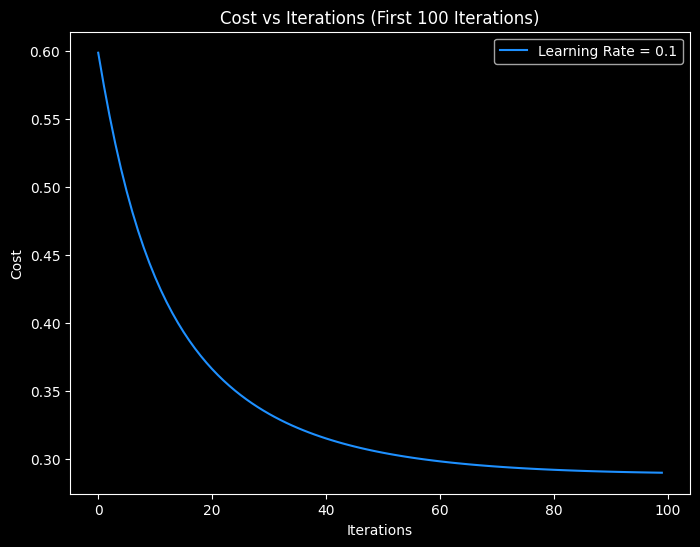

In [31]:
# Plot cost vs iterations
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
plt.plot(range(min(100, len(costs))), costs[:100], color='dodgerblue', label="Learning Rate = 0.1")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations (First 100 Iterations)")
plt.grid(False)
plt.legend()
plt.show()

## Plotting Cost vs Iterations (LR = 5)

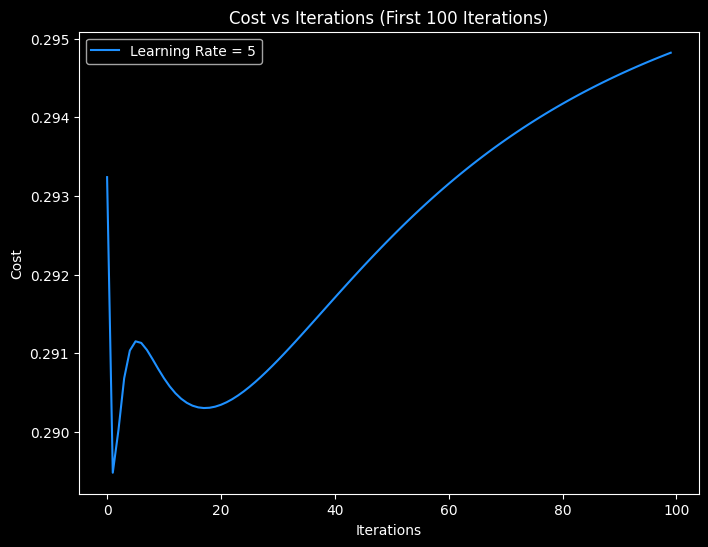

In [32]:
theta0_t, theta1_t, theta2_t, costs = batch_gradient_descent(X1_normalized, X2_normalized, Y_normalized, 5, 100)

# Plot cost vs iterations
plt.style.use('dark_background')
plt.figure(figsize=(8, 6))
plt.plot(range(min(100, len(costs))), costs[:100], color='dodgerblue', label="Learning Rate = 5")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations (First 100 Iterations)")
plt.grid(False)
plt.legend()
plt.show()

## Plotting Decision Boundary

In [33]:
def decision_plane(theta0, theta1, theta2, x1, x2):
    z = (theta0 + theta1 * x1 + theta2 * x2)
    return z

x1 = df['X1'].values.flatten()
x2 = df['X2'].values.flatten()

xx, yy = np.meshgrid(x1, x2)
z = decision_plane(theta0, theta1, theta2, xx, yy)

z_normalized = (z - np.min(z)) / (np.max(z) - np.min(z))

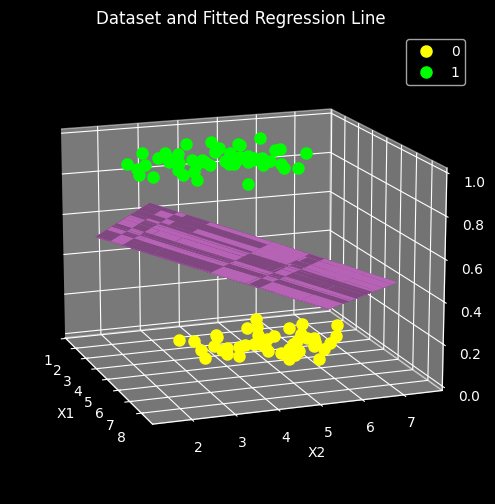

In [54]:
from mpl_toolkits.mplot3d import Axes3D

# Plot the data and the fitted regression line
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111,projection='3d')

# Plot decision boundary
ax.plot_surface(xx, yy, z_normalized, color='violet', alpha=1)

# Classify and color data points on Y and plot them
df['Y_dupe'] = df['Y']
colors = ['yellow', 'lime']
groups = df.groupby('Y')
for (name, group), color in zip(groups, colors):
    plt.plot(group.X1, group.X2, group.Y_dupe, marker='o', linestyle=' ', color=color, markersize=8, label=name)

ax.view_init(azim=340, elev=15)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
ax.set_title("Dataset and Fitted Regression Line")
ax.grid()
plt.legend()
plt.show(block=True)

## Making Predictions

In [35]:
def predict(theta0, theta1, theta2, x1, x2, threshold=0.5):
    pred = hypothesis(theta0, theta1, theta2, x1, x2)
    
    # Converting to binary prediction
    return (pred >= threshold).astype(int)

X1_test = X_test['X1'].values.flatten()
X2_test = X_test['X2'].values.flatten()
Y_Test = Y_test['Y'].values.flatten()

# Normalize the data
X1_test_norm = (X1_test - np.mean(X1_test)) / np.std(X1_test)
X2_test_norm = (X2_test - np.mean(X2_test)) / np.std(X2_test)

predictions = predict(theta0, theta1, theta2, X1_test_norm, X2_test_norm)

## Calculating Confusion Matrix

In [36]:
from matplotlib import cm

TP = np.sum((predictions == 1) & (Y_Test == 1))  # True Positives
TN = np.sum((predictions == 0) & (Y_Test == 0))  # True Negatives
FP = np.sum((predictions == 1) & (Y_Test == 0))  # False Positives
FN = np.sum((predictions == 0) & (Y_Test == 1))  # False Negatives

# Confusion Matrix
cm = np.array([[TP, FP], [FN, TN]])

# Metrics calculations
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Display results
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

Confusion Matrix:
[[ 8  0]
 [22  0]]
Accuracy: 0.27
Precision: 1.00
Recall: 0.27
F1-Score: 0.42
